# 0️⃣ Project Overview

## 🎓 Global Out-of-School Children Analysis (1970–2023)

**Goal:** Analyze the global proportion of **children of primary school age who are not enrolled in school** (*Out-of-School Children*, OOSC), based on World Bank Indicator **SE.PRM.UNER.ZS**.

---

### 🔎 What is OOSC?

- **OOSC (Out-of-School Children)**: % of children of official primary school age who are not enrolled in primary or secondary school.
- **Importance**: Linked to SDG 4.1.4 – ensuring all children complete free, equitable, quality primary education by 2030.

---

### 🎯 Project Objectives

1. Build an **end-to-end ML pipeline** (data loading, cleaning, EDA, modeling).
2. Practice **Python, pandas, scikit-learn** workflows for real datasets.
3. Create a **GitHub-ready portfolio project** for Data Science / ML job applications.

---

### 📂 Data Source

- **World Bank World Development Indicators (WDI)**
- Indicator Code: **SE.PRM.UNER.ZS**


# 1️⃣ Import Required Libraries

We start by importing essential libraries for:
- Data analysis: pandas, numpy
- Plotting: matplotlib
- Machine Learning: scikit-learn


In [2]:
import pandas as pd            # data manipulation
import numpy as np             # numerical computations
from pathlib import Path       # file paths
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set plot style for better aesthetics
plt.style.use("seaborn-v0_8")

# 2️⃣ Load OOSC Data

We read the **World Bank CSV file**.

⚠️ **Important:** The file contains **4 header rows of metadata** (description, source, notes).  
Use `skiprows=4` to skip them and read the actual data table.


In [3]:
# Define file path (assumes CSV is in the same folder as the notebook)
csv_file = "oosc_wdi.csv"

# Load data, skipping metadata rows
df = pd.read_csv(csv_file, skiprows=4)

# Print shape and preview
print("DataFrame shape (rows, columns):", df.shape)
df.head()

DataFrame shape (rows, columns): (266, 70)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Children out of school (% of primary school age),SE.PRM.UNER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Children out of school (% of primary school age),SE.PRM.UNER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Children out of school (% of primary school age),SE.PRM.UNER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Children out of school (% of primary school age),SE.PRM.UNER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Children out of school (% of primary school age),SE.PRM.UNER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3️⃣ Transform Data from Wide to Long Format

**Why?**  
World Bank data is in *wide format* (each year as a separate column).  
We convert to *long format* for analysis:

- Each row: Country-Year combination
- Columns: Country Name, Year, OOSC_rate (% of out-of-school children)


In [4]:
# Identify columns containing years (e.g., '1970', '1971', ...)
year_cols = [c for c in df.columns if c.isdigit()]

# Convert from wide to long format using pandas melt
df_long = df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    value_vars=year_cols,
    var_name="Year",
    value_name="OOSC_rate"
)

# Convert year to integer and OOSC_rate to numeric (force errors to NaN)
df_long["Year"] = df_long["Year"].astype(int)
df_long["OOSC_rate"] = pd.to_numeric(df_long["OOSC_rate"], errors="coerce")

# Drop rows where OOSC_rate is missing
df_long = df_long.dropna(subset=["OOSC_rate"])

# Print new shape and preview
print("Long format shape (rows, columns):", df_long.shape)
df_long.head()


Long format shape (rows, columns): (5107, 6)


,Country Name,Country Code,Indicator Name,Indicator Code,Year,OOSC_rate
2669,Argentina,ARG,Children out of school (% of primary school age),SE.PRM.UNER.ZS,1970,4.919240
2680,Bangladesh,BGD,Children out of school (% of primary school age),SE.PRM.UNER.ZS,1970,50.503681
2689,Brazil,BRA,Children out of school (% of primary school age),SE.PRM.UNER.ZS,1970,29.643890
2693,Botswana,BWA,Children out of school (% of primary school age),SE.PRM.UNER.ZS,1970,50.468609
2708,Costa Rica,CRI,Children out of school (% of primary school age),SE.PRM.UNER.ZS,1970,13.047480


# 4️⃣ Data Quality Check

We ensure that:
- **No negative values** (impossible for a percentage)
- **No values above 100%** (percentage ceiling)
- General statistical overview (mean, std, min, max)


In [5]:
# Describe OOSC_rate distribution
print("OOSC_rate Summary Statistics:\n", df_long["OOSC_rate"].describe())

# Check for negative values
neg = df_long[df_long["OOSC_rate"] < 0]
print("\nNumber of negative OOSC_rate values:", neg.shape[0])

# Check for values > 100%
over = df_long[df_long["OOSC_rate"] > 100]
print("Number of OOSC_rate values over 100%:", over.shape[0])


OOSC_rate Summary Statistics:
 count    5107.000000
mean       12.419547
std        16.591574
min         0.000000
25%         1.570000
50%         5.417330
75%        15.370537
max        89.862869
Name: OOSC_rate, dtype: float64

Number of negative OOSC_rate values: 0
Number of OOSC_rate values over 100%: 0


# 5️⃣ Plot Global Trends Over Time

We visualize how the **average global Out-of-School rate** has evolved from 1970–2023.


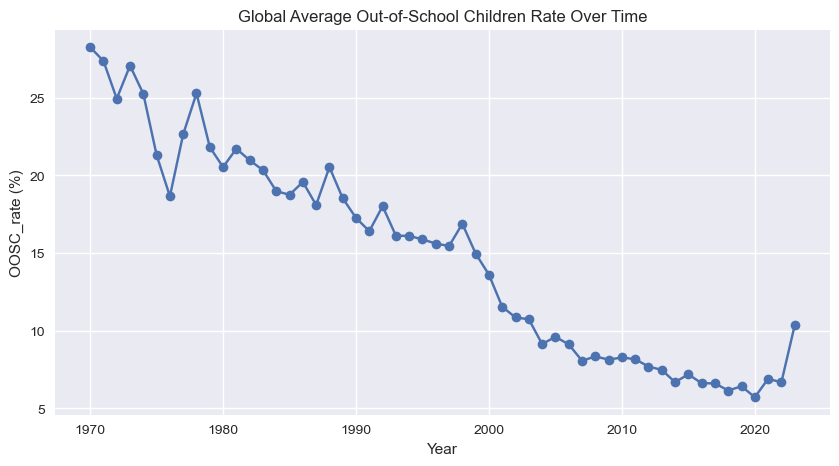

In [7]:
# Calculate mean OOSC_rate per year globally
global_trend = df_long.groupby("Year")["OOSC_rate"].mean()

# Plot trend line
plt.figure(figsize=(10,5))
plt.plot(global_trend.index, global_trend.values, marker="o")
plt.title("Global Average Out-of-School Children Rate Over Time")
plt.xlabel("Year")
plt.ylabel("OOSC_rate (%)")
plt.grid(True)
plt.show()


# 6️⃣ Histogram of OOSC_rate Distribution

We plot the distribution to see:
- Skewness (most countries have low or high rates?)
- Potential outliers


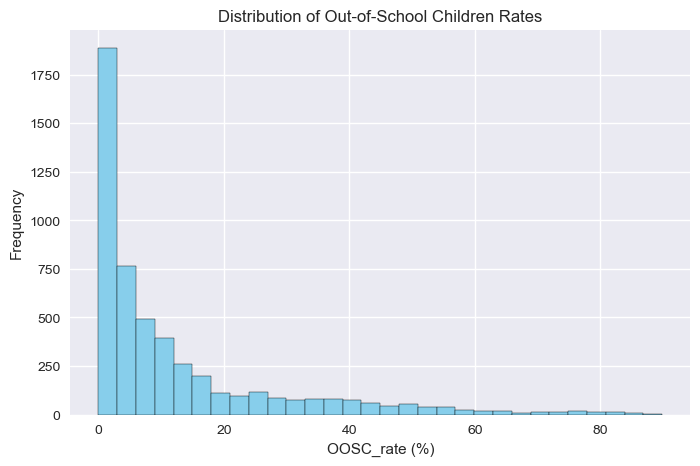

In [8]:
plt.figure(figsize=(8,5))
plt.hist(df_long["OOSC_rate"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Out-of-School Children Rates")
plt.xlabel("OOSC_rate (%)")
plt.ylabel("Frequency")
plt.show()

# 7️⃣ Top-10 Countries (Latest Year)

We identify countries with the **highest proportion of out-of-school children** in the most recent year.


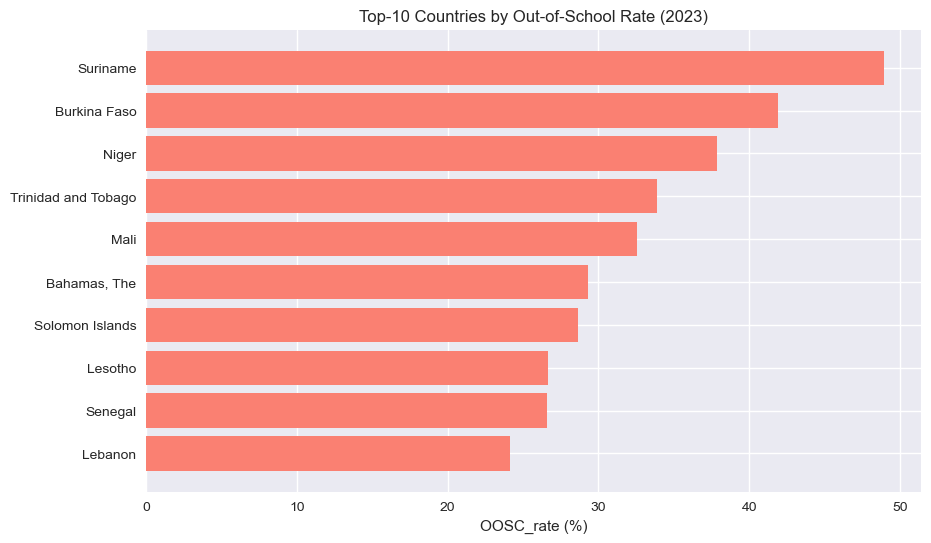

In [9]:
# Find the latest available year
latest_year = df_long["Year"].max()

# Filter for that year and get top 10 countries
top10 = df_long[df_long["Year"] == latest_year].sort_values("OOSC_rate", ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(top10["Country Name"], top10["OOSC_rate"], color="salmon")
plt.title(f"Top-10 Countries by Out-of-School Rate ({latest_year})")
plt.xlabel("OOSC_rate (%)")
plt.gca().invert_yaxis()  # Highest value on top
plt.show()


# 8️⃣ Generate Dummy GDP per Capita Data

Why?  
World Bank API is unavailable; we simulate GDP data to practice **multivariate regression** with OOSC_rate as target.

In real projects, replace this with **actual GDP data** from World Bank or Kaggle.


In [10]:
# Create dummy GDP data for each Country-Year combination
gdp_mock = df_long[["Country Name", "Country Code", "Year"]].drop_duplicates().copy()

np.random.seed(42)  # reproducibility

# Simulate GDP per capita as normally distributed around $5000 with some variation
gdp_mock["GDP_per_capita"] = np.random.normal(loc=5000, scale=2000, size=len(gdp_mock))

# Clip values to realistic range [$500, $50,000]
gdp_mock["GDP_per_capita"] = gdp_mock["GDP_per_capita"].clip(lower=500, upper=50000)

# Preview
gdp_mock.head()


,Country Name,Country Code,Year,GDP_per_capita
2669,Argentina,ARG,1970,5993.428306
2680,Bangladesh,BGD,1970,4723.471398
2689,Brazil,BRA,1970,6295.377076
2693,Botswana,BWA,1970,8046.059713
2708,Costa Rica,CRI,1970,4531.693251


# 9️⃣ Merge OOSC Data with GDP Data

We combine both datasets to prepare features for our Machine Learning model.


In [13]:
# Merge on Country Name, Country Code, and Year
df_ml = pd.merge(df_long, gdp_mock, on=["Country Name", "Country Code", "Year"], how="inner")

# Print shape and preview
print("Merged DataFrame shape (rows, columns):", df_ml.shape)
df_ml.head()


Merged DataFrame shape (rows, columns): (5107, 7)


,Country Name,Country Code,Indicator Name,Indicator Code,Year,OOSC_rate,GDP_per_capita
0,Argentina,ARG,Children out of school (% of primary school age),SE.PRM.UNER.ZS,1970,4.919240,5993.428306
1,Bangladesh,BGD,Children out of school (% of primary school age),SE.PRM.UNER.ZS,1970,50.503681,4723.471398
2,Brazil,BRA,Children out of school (% of primary school age),SE.PRM.UNER.ZS,1970,29.643890,6295.377076
3,Botswana,BWA,Children out of school (% of primary school age),SE.PRM.UNER.ZS,1970,50.468609,8046.059713
4,Costa Rica,CRI,Children out of school (% of primary school age),SE.PRM.UNER.ZS,1970,13.047480,4531.693251


# 🔟 Multivariate Regression

We build a **linear regression model** predicting OOSC_rate based on:

- **GDP_per_capita**: Does higher economic wealth reduce OOSC rates?
- **Year**: Are rates declining over time?

### Interpretation:
- **Negative GDP coefficient:** Higher GDP → lower OOSC_rate
- **Negative Year coefficient:** Rates declining over time globally


In [14]:
# Define features (X) and target (y)
X = df_ml[["GDP_per_capita", "Year"]]
y = df_ml["OOSC_rate"]

# Initialize and train model
model = LinearRegression()
model.fit(X, y)

# Output model coefficients
print("Model Intercept:", model.intercept_)
print("Model Coefficients:")
for feat, coef in zip(X.columns, model.coef_):
    print(f"  {feat}: {coef:.4f}")


Model Intercept: 818.5723740250277
Model Coefficients:
  GDP_per_capita: -0.0001
  Year: -0.4025


# ✅ Project Summary & Next Steps

### ✔ What we achieved:
1. **Loaded and cleaned real-world World Bank data**
2. **Performed EDA** (trend analysis, distribution, top countries)
3. **Built a multivariate regression model** (OOSC_rate ~ GDP + Year)

---

### 🎯 Next Steps:
- Replace dummy GDP data with **real GDP data**
- Include additional features (e.g. education expenditure, urban population)
- Test advanced models (Random Forest, XGBoost) for predictive improvement

